In [34]:
import pandas as pd
import os 
from pathlib import Path
from bertopic import BERTopic
import re 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import plotly.io as pio

import pandas as pd
import os 
from pathlib import Path
from nltk.corpus import stopwords

from preprocessing.preprocessing_module import full_cleaning_pipeline


metaproject_name = 'TopicModelling_META'
subproject_name = 'TopMod_pipeline'
# dataset_name = f'{condition}_dataset.csv'


dataset_name = "SensoryTool_CombinedData.csv"
HIGH_SENSORY = False #If False, corresponds to deep listening experience (no flicker)
condition = 'highsensory' if HIGH_SENSORY else 'deeplistening'
print(f'Condition : "{condition}"')




PROJDIR = os.path.expanduser(f"~/projects/{metaproject_name}")
DATADIR = os.path.join(PROJDIR,f'DATA/{dataset_name}')
CODEDIR = os.path.join(PROJDIR,f'{subproject_name}')



%matplotlib inline

Condition : "deeplistening"


Parameters for BERTopic

https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html

In [35]:
from transformers.pipelines import pipeline

#Parameters for Topic Modelling
remove_stopwords = True
extended_stopwords = False

embedding_model = "all-MiniLM-L6-v2" #which transformer-based model to use to create embeddings of the reports
# embedding_model = pipeline("feature-extraction", model="distilbert-base-cased")
# topic_model = BERTopic(embedding_model=embedding_model)
min_topic_size = 10 #sets the minimum number of reports that a topic should have



Import Data

In [36]:
save_csv = False

df = pd.read_csv(DATADIR)
dataset = df[df['meta_HighSensory'] == HIGH_SENSORY]['reflection_answer']
reports = dataset[dataset.notna() & (dataset != '')].reset_index(drop=True)
reports = pd.DataFrame(reports)

reports = full_cleaning_pipeline(reports, 'reflection_answer')
reports = reports.reset_index(drop=True)

print('N={} reports (HighSensory = {})'.format(len(reports),HIGH_SENSORY))
reports.head()

# Save the cleaned data
if save_csv:
    base_name, ext = os.path.splitext(DATASET_NAME)
    new_path = f"{base_name}_{CONDITION}_preprocessed{ext}"
    preproc_path = os.path.join(PROJDIR, f'DATA/preprocessed/{new_path}')
    df_clean.to_csv(preproc_path, index=False)

/var/folders/1d/q_0fy53s0jdcsc1sb09wkntw00z7v7/T/ipykernel_47727/3532124292.py:3: DtypeWarning:

Columns (23,24,71,73,75,77,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,157,159,161,165,168,196,203,205) have mixed types. Specify dtype option on import or set low_memory=False.



N=89 reports (HighSensory = False)


## BERTopic

https://miro.medium.com/v2/resize:fit:4800/format:webp/0*DxAqCqx6dzg0KQlg.png

In [37]:
# finds the maximum min_topic_size that doesn't cause an error

def find_max_topics(data, embedding_model, min_topic_size_range):
    max_topics = 0
    optimal_min_topic_size = 0
    
    for min_size in min_topic_size_range:
        try:
            model = BERTopic(language="english", 
                             calculate_probabilities=True, 
                             verbose=True,
                             nr_topics='auto',
                             embedding_model=embedding_model,
                             min_topic_size=min_size)
            
            topics, _ = model.fit_transform(data)
            num_topics = len(set(topics))  # Calculate the number of unique topics
            
            if num_topics > max_topics:
                max_topics = num_topics
                optimal_min_topic_size = min_size
                
            print(f"Min_topic_size: {min_size}, Num Topics: {num_topics}")
            
        except ValueError as e:
            print(f"Error with min_topic_size: {min_size}. Error message: {str(e)}")
            continue
        
    return max_topics, optimal_min_topic_size

# Example usage:
min_topic_size_range = range(10, 1, -1)  # Adjust the range as per your requirement
data = reports['reflection_answer']

max_topics, optimal_min_topic_size = find_max_topics(data, embedding_model, min_topic_size_range)

print(f"Maximum number of topics: {max_topics} found with min_topic_size: {optimal_min_topic_size}")


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:31,132 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:32,028 - BERTopic - Reduced dimensionality
2023-10-03 17:10:32,032 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:32,042 - BERTopic - Reduced number of topics from 3 to 3


Min_topic_size: 10, Num Topics: 3


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:32,566 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:33,592 - BERTopic - Reduced dimensionality
2023-10-03 17:10:33,596 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:33,605 - BERTopic - Reduced number of topics from 3 to 3


Min_topic_size: 9, Num Topics: 3


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:34,150 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:35,007 - BERTopic - Reduced dimensionality
2023-10-03 17:10:35,012 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:35,021 - BERTopic - Reduced number of topics from 3 to 3


Min_topic_size: 8, Num Topics: 3


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:35,566 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:36,441 - BERTopic - Reduced dimensionality
2023-10-03 17:10:36,446 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:36,456 - BERTopic - Reduced number of topics from 3 to 3


Min_topic_size: 7, Num Topics: 3


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:36,977 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:37,842 - BERTopic - Reduced dimensionality
2023-10-03 17:10:37,847 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:37,857 - BERTopic - Reduced number of topics from 4 to 4


Min_topic_size: 6, Num Topics: 4


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:38,402 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:39,284 - BERTopic - Reduced dimensionality
2023-10-03 17:10:39,289 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:39,302 - BERTopic - Reduced number of topics from 6 to 6


Min_topic_size: 5, Num Topics: 6


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:39,831 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:40,855 - BERTopic - Reduced dimensionality
2023-10-03 17:10:40,860 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:40,869 - BERTopic - Reduced number of topics from 3 to 3


Min_topic_size: 4, Num Topics: 3


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:41,416 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:42,316 - BERTopic - Reduced dimensionality
2023-10-03 17:10:42,321 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:42,332 - BERTopic - Reduced number of topics from 6 to 6


Min_topic_size: 3, Num Topics: 6


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:42,868 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:43,692 - BERTopic - Reduced dimensionality
2023-10-03 17:10:43,699 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:43,712 - BERTopic - Reduced number of topics from 11 to 11


Min_topic_size: 2, Num Topics: 11
Maximum number of topics: 11 found with min_topic_size: 2


### Training the BERT model

In [38]:
from bertopic import BERTopic

model = BERTopic(language="english", calculate_probabilities=True, verbose=True,nr_topics='auto',embedding_model=embedding_model,min_topic_size=optimal_min_topic_size) #The higher the value of min_topic_size, the more specific the topics will be
topics, probs = model.fit_transform(reports['reflection_answer']) #Fit model to data : topics are the topic labels for each document, probs are the probabilities of each topic for each document
model.visualize_topics() #Visualize topics


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-10-03 17:10:44,253 - BERTopic - Transformed documents to Embeddings
2023-10-03 17:10:45,151 - BERTopic - Reduced dimensionality
2023-10-03 17:10:45,158 - BERTopic - Clustered reduced embeddings
2023-10-03 17:10:45,170 - BERTopic - Reduced number of topics from 9 to 9


### Topic extraction and representation

In [39]:
topic_freq = model.get_topic_freq().head() #Get the frequency of each topic
freq = model.get_topic_info() #see the most representative terms for each topic
print("N number of topics: ",len(freq))
print(freq.head())


N number of topics:  9
   Topic  Count                                     Name  \
0     -1      6  -1_dream_anyway_otherwise_enlightenment   
1      0     41                 0_colours_eyes_saw_water   
2      1     15                  1_like_felt_room_things   
3      2     10        2_acceptance_child_asleep_anxiety   
4      3      5             3_thoughts_by_future_passing   

                                      Representation  \
0  [dream, anyway, otherwise, enlightenment, eith...   
1  [colours, eyes, saw, water, felt, everything, ...   
2  [like, felt, room, things, time, memories, try...   
3  [acceptance, child, asleep, anxiety, inner, kn...   
4  [thoughts, by, future, passing, whereas, wande...   

                                 Representative_Docs  
0  [woman next sniffing move difficult get back, ...  
1  [He told start could keep eyes open lot though...  
2  [various flashing images memories random event...  
3  [love feeling amazing would come back fell asl...  
4  [

## Prileminary visualisation

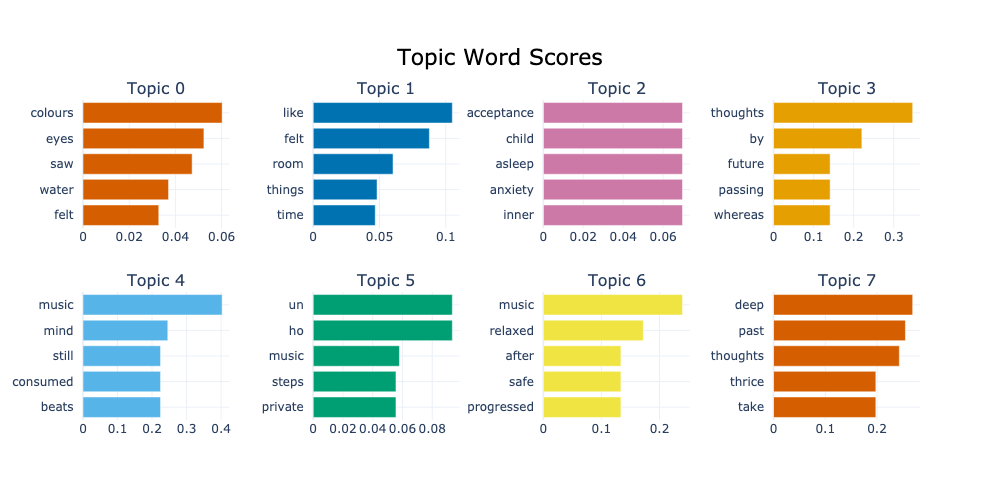

In [40]:
outputs_path = os.path.join(CODEDIR,'BERT_outputs')

# Save the barchart visualization to a file
fig = model.visualize_barchart(top_n_topics=10) #Visualize the top 10 topics
save_path_barchart = os.path.join(outputs_path,'BERT_barchart.png')
fig.write_image(save_path_barchart)

# # Import the Image and display functions from IPython
# from IPython.display import Image, display

# Display the saved image
display(Image(filename=save_path_barchart))

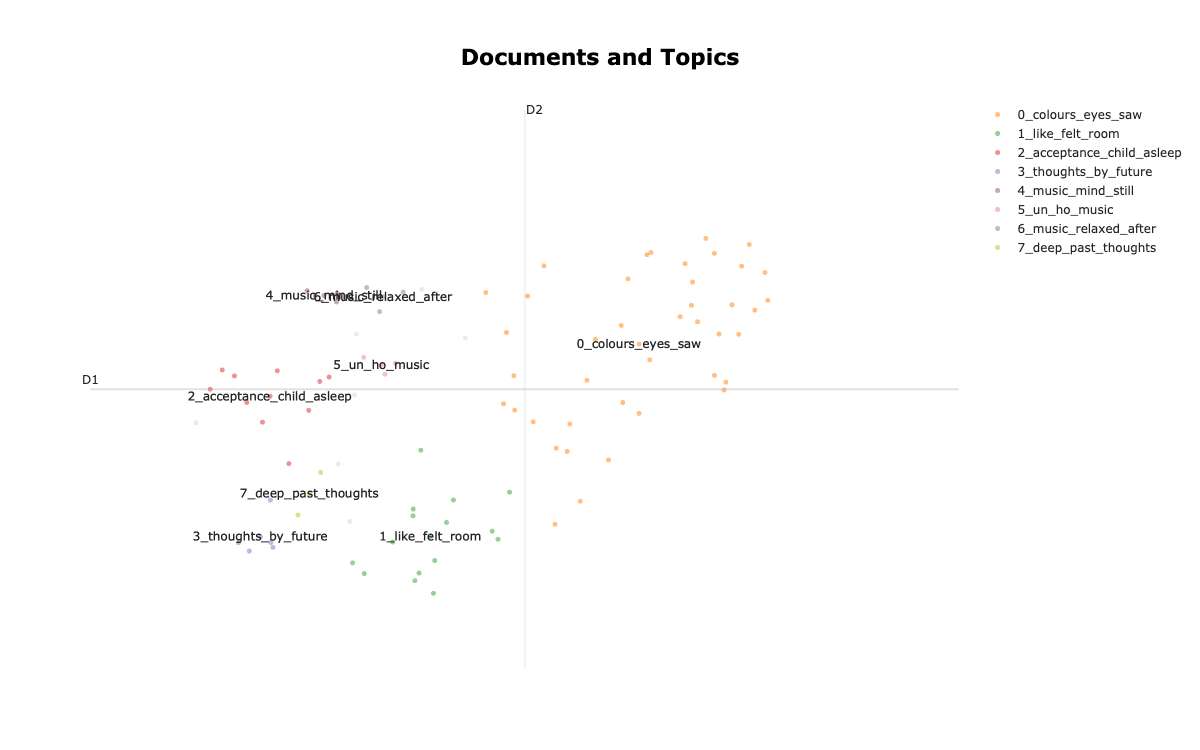

In [41]:
# Save the barchart visualization to a file
fig = model.visualize_documents(reports['reflection_answer'])
save_path_cloud = os.path.join(outputs_path,'BERT_cloud_{}.png'.format(condition))
fig.write_image(save_path_cloud)

# # Import the Image and display functions from IPython
# from IPython.display import Image, display

# Display the saved image
display(Image(filename=save_path_cloud))

In [42]:
model.visualize_heatmap(top_n_topics=10) #Visualize the top 10 topics as a heatmap